In [4]:
from src.stitching.kmm import kmm_thinning
from src.stitching.morphorogical_skeletonization import morphological_skeletonization
from src.improvement.connect_broken_fingerprint_ridges import connect_broken_fingerprint_ridges
from src.detect_minutiae.detect_minutiae import detect_minutiae,draw_minutiae, \
    improved_detect_minutiae, improved_draw_minutiae, advanced_detect_minutiae, \
    detect_cores_deltas
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
param_morph_threshold = 110 # Próg binaryzacji
param_morph_kernel_type = 'cross' # 'cross' lub 'square'

# Dla connect_broken_fingerprint_ridges
param_connect_closing_kernel = 5
param_connect_bridge_dilate_kernel = 3
param_connect_bridge_erode_kernel = 3
param_connect_bridge_iterations = 1
param_connect_final_thinning = True # Czy próbować ponownie ścienić po połączeniu

# Dla detect_minutiae
param_minutiae_border_margin = 15

# Dla draw_minutiae
param_draw_show_labels = True
param_draw_marker_radius = 4
param_draw_font_scale = 0.35
param_draw_line_thickness = 1
# --- Koniec parametrów ---

In [6]:
def test_kmm_thinning(input_path, output_path, apply_preprocessing=False, apply_postprocessing=False):
    """
    Test function to demonstrate the KMM thinning algorithm.

    Args:
        input_path (str): Path to the input image
        output_path (str): Path to save the output image
        apply_preprocessing (bool): Whether to apply preprocessing techniques
        apply_postprocessing (bool): Whether to apply postprocessing techniques
    """
    kmm_thinning(
        input_path, 
        output_path, 
        apply_preprocessing=apply_preprocessing, 
        apply_postprocessing=apply_postprocessing
    )
    print(f"Thinned image saved to {output_path}")

def test_kmm_with_enhancements(input_path, output_path):
    """
    Test function to demonstrate the KMM thinning algorithm with morphological enhancements.

    Args:
        input_path (str): Path to the input image
        output_path (str): Path to save the output image
    """
    # Define preprocessing parameters
    preprocessing_params = {
        'noise_removal': True,
        'dilation': True,
        'kernel_size': 3
    }

    # Define postprocessing parameters
    postprocessing_params = {
        'closing': True,
        'bridging': True,
        'kernel_size': 3,
        'directional_closing': False,

    }

    # Apply KMM thinning with enhancements
    kmm_thinning(
        input_path, 
        output_path, 
        apply_preprocessing=False,
        apply_postprocessing=True,
        preprocessing_params=preprocessing_params,
        postprocessing_params=postprocessing_params
    )
    print(f"Enhanced thinned image saved to {output_path}")


### First version of KMM algorithm, image processsing and minuntiae detection

Enhanced thinned image saved to data/fingerprint_01_thinned_enhanced.png


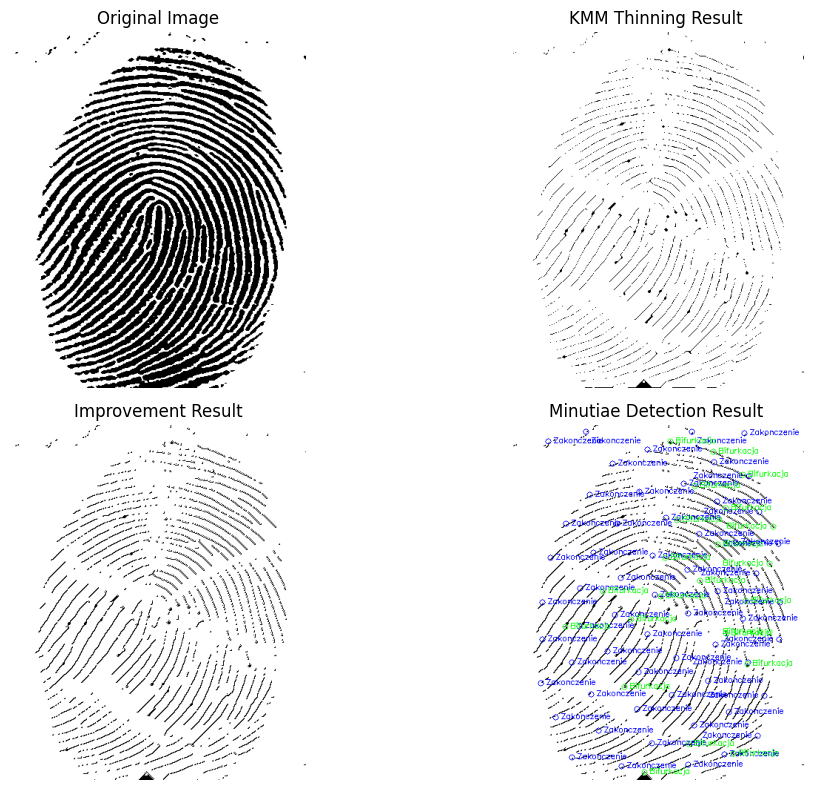

In [32]:
test_image = cv2.imread("data/fingerprint_01.png", cv2.IMREAD_GRAYSCALE)
test_kmm_with_enhancements("data/fingerprint_01.png", "data/fingerprint_01_thinned_enhanced.png")
kmm_result= cv2.imread("data/fingerprint_01_thinned_enhanced.png", cv2.IMREAD_GRAYSCALE)
improvement_result = connect_broken_fingerprint_ridges(kmm_result)
data_minutiae = detect_minutiae(improvement_result)
# Draw detected minutiae on the image
resut_minutiae = draw_minutiae(improvement_result, data_minutiae)

#print original, kmm result, improvement result and minutiae result
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(test_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(kmm_result, cmap='gray')
plt.title('KMM Thinning Result')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(improvement_result, cmap='gray')
plt.title('Improvement Result')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(resut_minutiae, cmap='gray')
plt.title('Minutiae Detection Result')
plt.axis('off')
plt.tight_layout()
plt.show()

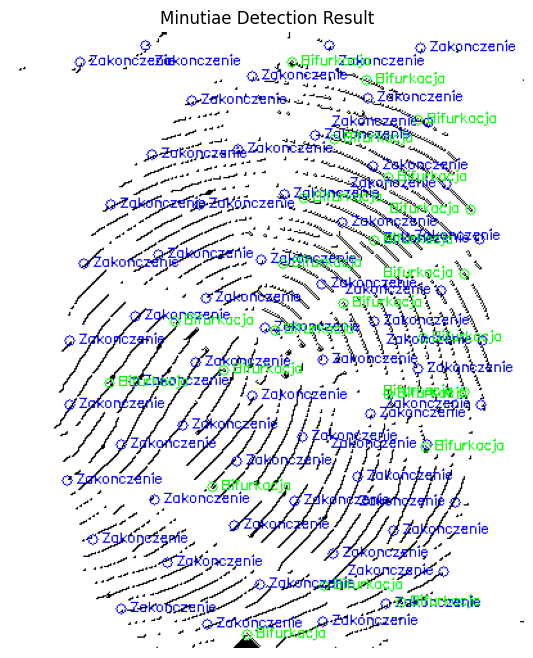

In [33]:
plt.figure(figsize=(10,8))
plt.imshow(resut_minutiae, cmap='gray')
plt.title('Minutiae Detection Result')
plt.axis('off')
plt.show()

Show only results of thinning:

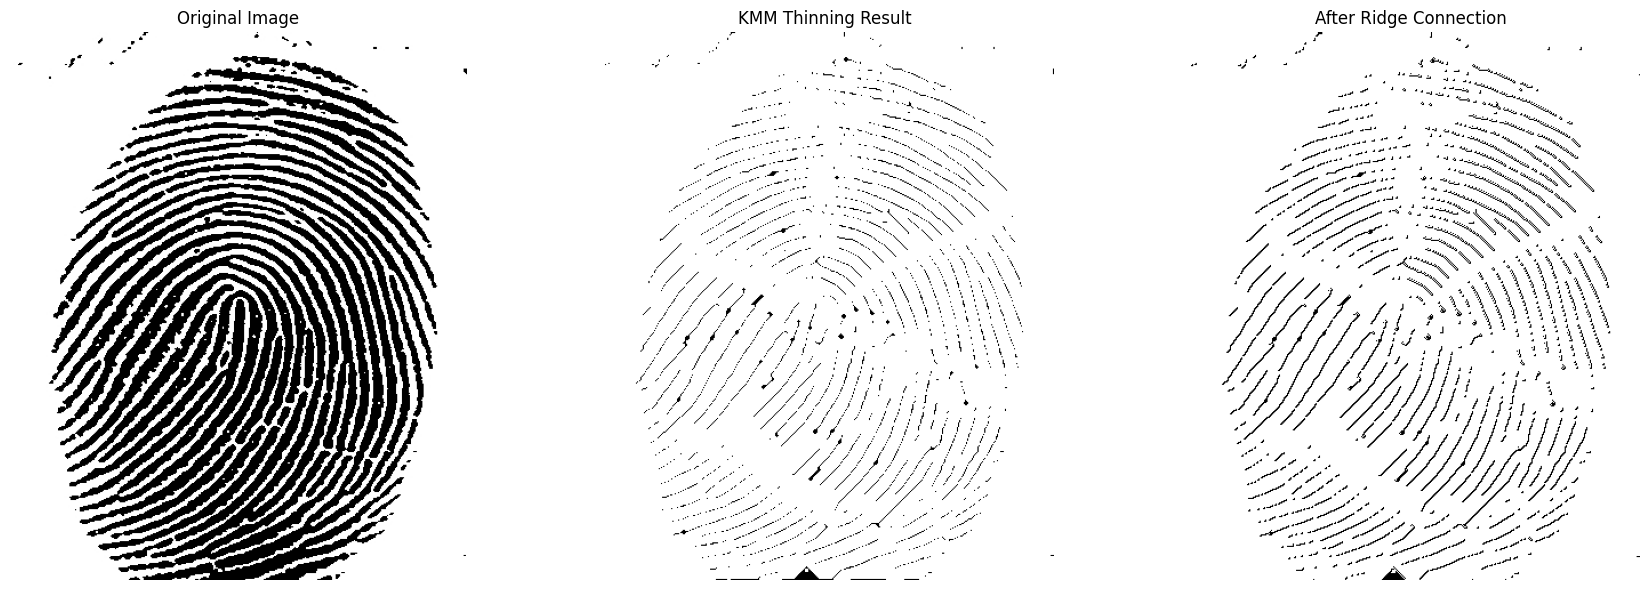

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(test_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(kmm_result, cmap='gray')
axes[1].set_title('KMM Thinning Result')
axes[1].axis('off')

axes[2].imshow(improvement_result, cmap='gray')
axes[2].set_title('After Ridge Connection')
axes[2].axis('off')

plt.tight_layout()
plt.savefig('output/fingerprint_processing_comparison.png')
plt.show()

### Optimized and advanced version of image processing and minuntiae detection

Using morphological thinning and detecting cores and deltas

Valid orientation blocks: 2069/3000


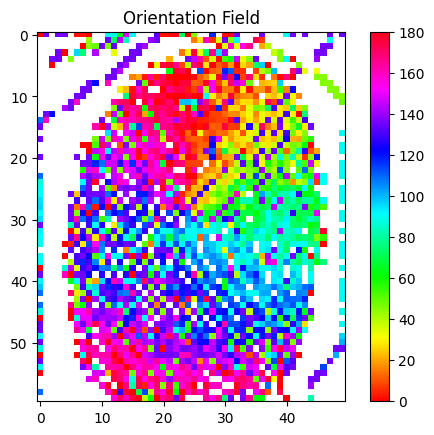

Core candidates found: 105
Delta candidates found: 83


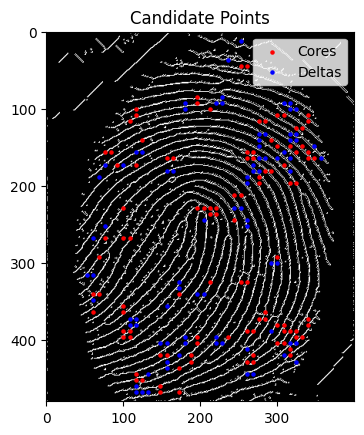

{'cores': [(304, 148)], 'deltas': [(291, 158)], 'terminations': [], 'bifurcations': []}


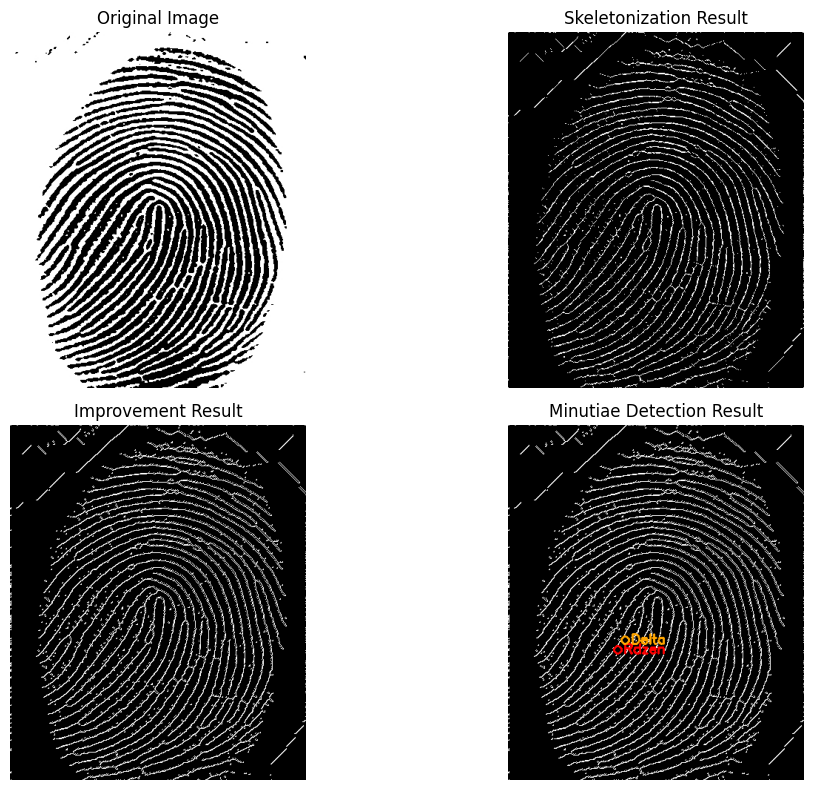

In [7]:
test_image = cv2.imread("data/fingerprint_01.png", cv2.IMREAD_GRAYSCALE)
skeleton_result = morphological_skeletonization(test_image,100)

improvement_result = connect_broken_fingerprint_ridges(skeleton_result)

# data_minutiae = improved_detect_minutiae(improvement_result,border_margin=20, min_distance = 50, min_ridge_length=10)

# data_minutiae = detect_minutiae(improvement_result,border_margin=20, min_distance = 90)
block_size = 8
eps = 3*block_size
data_minutiae = detect_cores_deltas(improvement_result,
                                    cluster_eps=eps,
                                    block_size=block_size,
                                    debug=True)
# Draw detected minutiae on the image
print(data_minutiae)
resut_minutiae = improved_draw_minutiae(improvement_result, data_minutiae,show_labels=True)

#print original, skeleton result, improvement result and minutiae result
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(test_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(skeleton_result, cmap='gray')
plt.title('Skeletonization Result')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(improvement_result, cmap='gray')
plt.title('Improvement Result')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(resut_minutiae, cmap='gray')
plt.title('Minutiae Detection Result')
plt.axis('off')
plt.tight_layout()
plt.show()

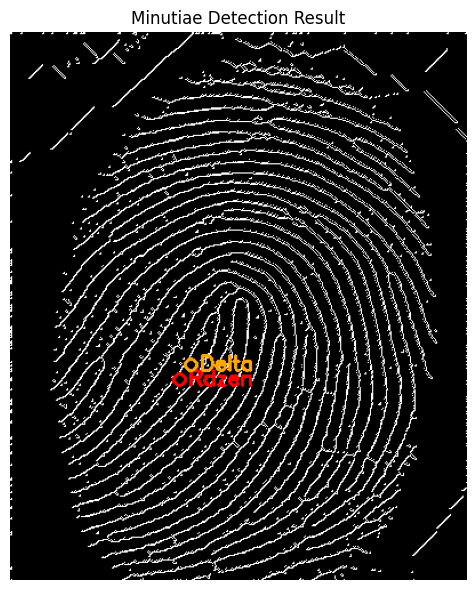

In [8]:
#show resut_minutiae
plt.figure(figsize=(6, 6))
plt.imshow(resut_minutiae, cmap='gray')
plt.title('Minutiae Detection Result')
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# cv2.imwrite("output/result_minutiae_delta_core.png",resut_minutiae)

True

Detect bifurcations and endings

{'terminations': [(20, 263), (22, 75), (34, 169), (34, 363), (92, 303), (99, 120), (102, 35), (102, 215), (156, 362), (165, 267), (166, 165), (175, 77), (226, 322), (236, 205), (245, 122), (258, 39), (290, 267), (296, 363), (314, 165), (331, 76), (363, 303), (378, 219), (394, 135), (414, 57), (434, 373), (438, 272)], 'bifurcations': [(20, 75), (20, 250), (38, 335), (41, 154), (97, 276), (106, 102), (114, 195), (134, 348), (177, 143), (177, 266), (179, 57), (213, 361), (234, 203), (250, 105), (260, 288), (296, 364), (308, 172), (315, 52), (348, 299), (371, 112), (384, 216), (426, 323), (437, 63), (445, 144)], 'cores': [], 'deltas': []}


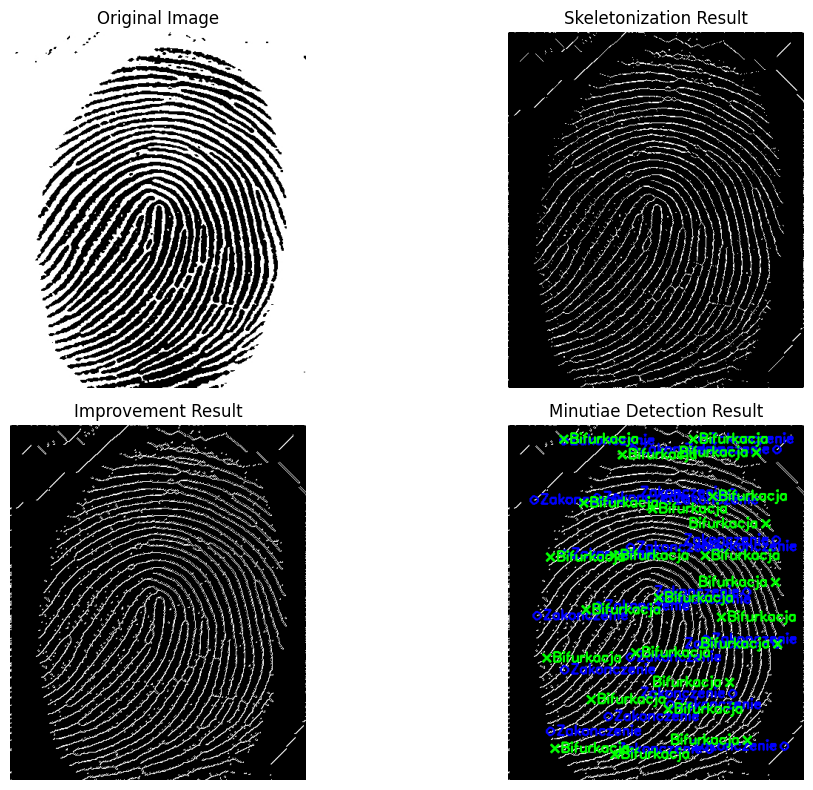

In [22]:
test_image = cv2.imread("data/fingerprint_01.png", cv2.IMREAD_GRAYSCALE)
skeleton_result = morphological_skeletonization(test_image,100)

improvement_result = connect_broken_fingerprint_ridges(skeleton_result)

# data_minutiae = improved_detect_minutiae(improvement_result,border_margin=20, min_distance = 100, min_ridge_length=10)

data_minutiae = detect_minutiae(improvement_result, border_margin=20, min_distance=80)

# Draw detected minutiae on the image
print(data_minutiae)
resut_minutiae = improved_draw_minutiae(improvement_result, data_minutiae,show_labels=True)

#print original, skeleton result, improvement result and minutiae result
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(test_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(skeleton_result, cmap='gray')
plt.title('Skeletonization Result')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(improvement_result, cmap='gray')
plt.title('Improvement Result')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(resut_minutiae, cmap='gray')
plt.title('Minutiae Detection Result')
plt.axis('off')
plt.tight_layout()
plt.show()

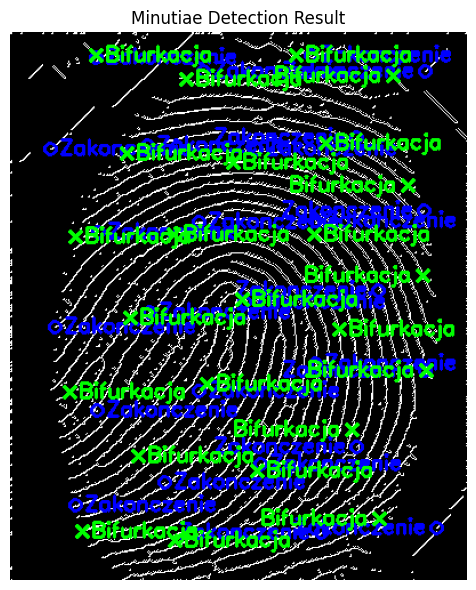

In [23]:
# show resut_minutiae
plt.figure(figsize=(6, 6))
plt.imshow(resut_minutiae, cmap='gray')
plt.title('Minutiae Detection Result')
plt.axis('off')
plt.tight_layout()
plt.show()